In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset into a DataFrame
def load_dataset(file_path):
    return pd.read_json(file_path)

In [4]:
# Perform basic EDA
def perform_eda(df):
    # 1. Dataset overview
    overview = {
        "Total Commands": len(df),
        "Unique Intents": df['intent'].nunique(),
        "Intent Distribution": df['intent'].value_counts().to_dict(),
    }
    
    # 2. Flatten the rooms and actions for further analysis
    rooms_flat = [room for rooms in df['rooms'] for room in rooms]
    actions_flat = [action['action'] for actions in df['actions'] for action in actions]

    # Create Series for room and action frequencies
    rooms_series = pd.Series(rooms_flat)
    actions_series = pd.Series(actions_flat)

    # Top rooms and actions
    top_rooms = rooms_series.value_counts()
    top_actions = actions_series.value_counts()

    # Visualization: Intent Distribution
    plt.figure(figsize=(8, 5))
    df['intent'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Intents', fontsize=14)
    plt.xlabel('Intent', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Visualization: Top 10 Rooms
    plt.figure(figsize=(10, 6))
    top_rooms.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Distribution of all Rooms', fontsize=14)
    plt.xlabel('Room', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Visualization: Top 10 Actions
    plt.figure(figsize=(10, 6))
    top_actions.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Distribution of Actions', fontsize=14)
    plt.xlabel('Action', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return overview

In [5]:
# os.listdir("../../data")

In [6]:
# File path (Update this with the local path to your dataset)
root = "../../data"
file_name = "restructured_dataset.json"
file_path = os.path.join(root, file_name)

# Load and analyze the dataset
df = load_dataset(file_path)
df.head()

,command,intent,rooms,actions
0,Kitchen ko lights off garidinus.,single_room_control,[kitchen],"[{'room': 'kitchen', 'action': 'turn_off'}]"
1,Please turn on the store room lights.,single_room_control,[store room],"[{'room': 'store room', 'action': 'turn_on'}]"
2,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,"[living room, kitchen]","[{'room': 'living room', 'action': 'adjust_bri..."
3,Turn off the balcony lights.,single_room_control,[balcony],"[{'room': 'balcony', 'action': 'turn_off'}]"
4,Padhney kotha ko light blue color ma change ga...,single_room_control,[study room],"[{'room': 'study room', 'action': 'change_colo..."


In [7]:
df['intent'].value_counts()

intent
single_room_control    4851
multi_room_control     1193
Name: count, dtype: int64

In [8]:
# checking for room counts
rooms_flat = [room for rooms in df['rooms'] for room in rooms]
rooms_series = pd.Series(rooms_flat)
rooms_series.value_counts()

kitchen         1431
living room     1386
bedroom          893
prayer room      682
balcony          654
study room       580
corridor         554
terrace          552
store room       421
store             62
bathroom          16
generic room       4
dining area        1
basement           1
other rooms        1
Name: count, dtype: int64

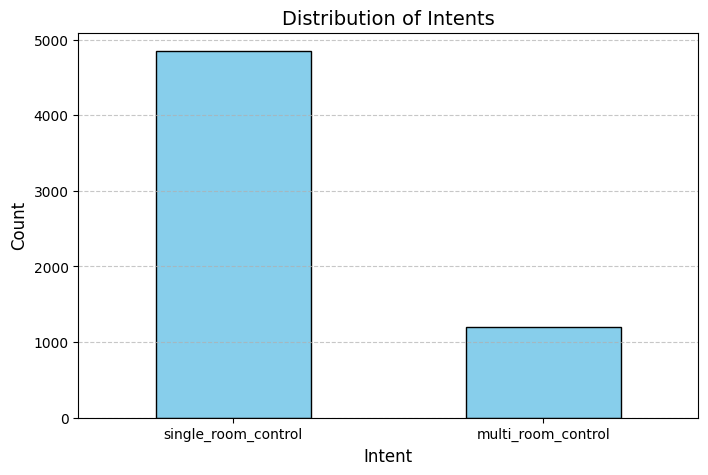

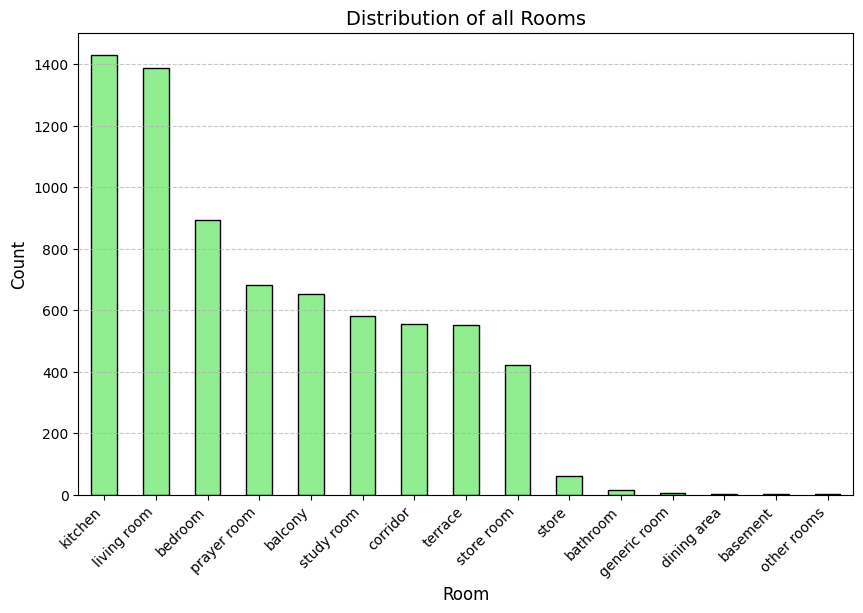

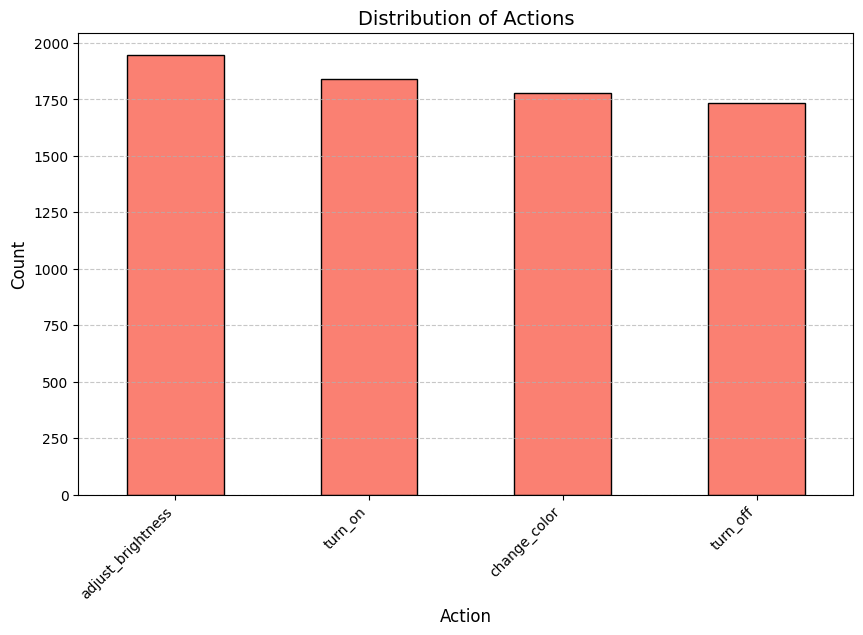

Dataset Overview:
Total Commands: 6044
Unique Intents: 2
Intent Distribution: {'single_room_control': 4851, 'multi_room_control': 1193}


In [9]:
overview = perform_eda(df)

# Print dataset overview
print("Dataset Overview:")
for key, value in overview.items():
    print(f"{key}: {value}")

## Initial Findings
1. Imbalance in Intents
 - Single Room Control: A significantly larger number of commands fall under single_room_control.
 - Multi Room Control: Fewer commands involve multi_room_control.

This indicates that the dataset is imbalanced, with the majority of commands targeting single-room operations. This imbalance could affect model training if not addressed.

2. Imbalance in Rooms
- Dominance of Kitchen and Living Room:
  - Kitchen and living room are mentioned significantly more often than other rooms, which could lead to a model overly biased toward these rooms.
  - Rooms like "store" or "terrace" are far less represented.

- Duplicate Room Names:
  - "Store" and "Store Room" are likely referring to the same room but are treated as separate entities. This inconsistency in naming needs to be addressed to avoid data fragmentation and reduce noise.

- Imbalance Across Rooms:
  - The stark differences in the frequency of room mentions could affect the model’s ability to generalize to less common rooms like "prayer room" or "terrace."


## Hypothesis?

1. The higher count of kitchen and living room might be because of the reason that these rooms have been addressed a lot in single room commands.

In [10]:
df1 = df.copy()
df1.head()

,command,intent,rooms,actions
0,Kitchen ko lights off garidinus.,single_room_control,[kitchen],"[{'room': 'kitchen', 'action': 'turn_off'}]"
1,Please turn on the store room lights.,single_room_control,[store room],"[{'room': 'store room', 'action': 'turn_on'}]"
2,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,"[living room, kitchen]","[{'room': 'living room', 'action': 'adjust_bri..."
3,Turn off the balcony lights.,single_room_control,[balcony],"[{'room': 'balcony', 'action': 'turn_off'}]"
4,Padhney kotha ko light blue color ma change ga...,single_room_control,[study room],"[{'room': 'study room', 'action': 'change_colo..."


In [11]:
df1_single = df1[df1['intent'] == 'single_room_control']

Text(0.5, 1.0, 'Single Room intents - Room Distribution')

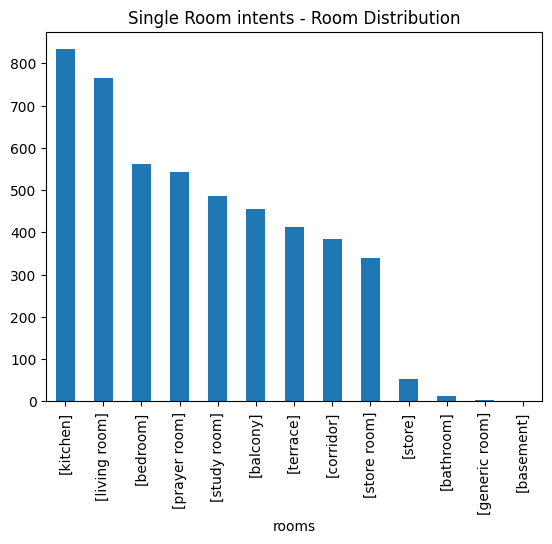

In [20]:
df1_single['rooms'].value_counts().plot(kind='bar')
plt.title("Single Room intents - Room Distribution")

It can be seen that the distribution of kitchen and living room is higher than any other rooms in single room commands.

We also need to check for their distribution in multi room commands.

In [13]:
df1_multi = df1[df1['intent'] == 'multi_room_control']
df1_multi

,command,intent,rooms,actions
2,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,"[living room, kitchen]","[{'room': 'living room', 'action': 'adjust_bri..."
7,Please turn on the corridor lights and dim the...,multi_room_control,"[corridor, terrace]","[{'room': 'corridor', 'action': 'turn_on'}, {'..."
8,Bato ko lights off garera baranda ko lights on...,multi_room_control,"[corridor, balcony]","[{'room': 'corridor', 'action': 'turn_off'}, {..."
21,Baithak kothaa ko lights on garera sutney koth...,multi_room_control,"[living room, bedroom]","[{'room': 'living room', 'action': 'turn_on'},..."
24,Turn on the balcony lights and make store room...,multi_room_control,"[balcony, store room]","[{'room': 'balcony', 'action': 'turn_on'}, {'r..."
...,...,...,...,...
6026,Poojako kotha ra bhaanchaa ko lights on garnus.,multi_room_control,"[prayer room, kitchen]","[{'room': 'prayer room', 'action': 'turn_on'},..."
6032,Turn on the terrace light and off the store ro...,multi_room_control,"[terrace, store room]","[{'room': 'terrace', 'action': 'turn_on'}, {'r..."
6035,Bhanxa ra baithak kotha ko lights off garnus.,multi_room_control,"[kitchen, living room]","[{'room': 'kitchen', 'action': 'turn_off'}, {'..."
6039,Bhanxa ko batti off garera baithak kotha ko ba...,multi_room_control,"[kitchen, living room]","[{'room': 'kitchen', 'action': 'turn_off'}, {'..."


In [14]:
#checking for occurences of living room and kitchen together
df_living_kitchen = df1_multi[df1_multi['rooms'].apply(lambda x: x == ['living room', 'kitchen'] or x == ['kitchen', 'living room'])]

In [15]:
len(df_living_kitchen)

327

In [16]:
rooms_flat_1 = [room for rooms in df1_multi['rooms'] for room in rooms]
actions_flat_1 = [action['action'] for actions in df1_multi['actions'] for action in actions]

# Create Series for room and action frequencies
rooms_series_1 = pd.Series(rooms_flat_1)
actions_series_1 = pd.Series(actions_flat_1)

Text(0.5, 1.0, 'Multi room intents - Room Distribution')

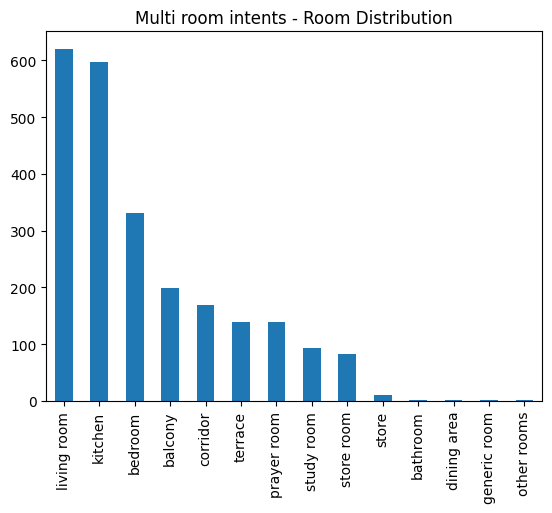

In [19]:
rooms_series_1.value_counts().plot(kind='bar')
plt.title("Multi room intents - Room Distribution")

In [ ]:
#checking for other occurences of kitchen in multi room commands
df_living_kitchen = df1_multi[df1_multi['rooms'].apply(lambda x: x == ['living room', 'kitchen'] or x == ['kitchen', 'living room'])]

In [88]:
df1_multi[df1_multi['rooms'].apply(lambda x: ("kitchen" in x and "living room" not in x))]

,command,intent,rooms,actions
58,Switch off the puja room lights and dim the ki...,multi_room_control,"[prayer room, kitchen]","[{'room': 'prayer room', 'action': 'turn_off'}..."
67,Can you switch on the kitchen lights and adjus...,multi_room_control,"[kitchen, bedroom]","[{'room': 'kitchen', 'action': 'turn_on'}, {'r..."
76,Bhanxa ra puja kotha ko lights on garideu.,multi_room_control,"[kitchen, prayer room]","[{'room': 'kitchen', 'action': 'turn_on'}, {'r..."
79,Turn off the lights in the bardali and adjust ...,multi_room_control,"[balcony, kitchen]","[{'room': 'balcony', 'action': 'turn_off'}, {'..."
87,Bhaanchaa ra sutney kotha ko batti medium brig...,multi_room_control,"[kitchen, bedroom]","[{'room': 'kitchen', 'action': 'adjust_brightn..."
...,...,...,...,...
5874,Bhaanchaa ko batti ra sutney kotha ko lights l...,multi_room_control,"[kitchen, bedroom]","[{'room': 'kitchen', 'action': 'change_color',..."
5914,Kausi ko batti balayera bhansaa ko batti off g...,multi_room_control,"[terrace, kitchen]","[{'room': 'terrace', 'action': 'turn_on'}, {'r..."
5982,Bhaanchaa ra sutney kotha ko lights off garna ...,multi_room_control,"[kitchen, bedroom]","[{'room': 'kitchen', 'action': 'turn_off'}, {'..."
6015,Sutney kotha ra bhancha ko lights off garidinus.,multi_room_control,"[bedroom, kitchen]","[{'room': 'bedroom', 'action': 'turn_off'}, {'..."
